Create an empty graph: Our first example of a graph will be an empty graph. The following little Python script uses NetworkX to create an empty graph:



In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

G=nx.DiGraph()

Adding Nodes to our Graph: Now we will add some nodes to our graph. We can add a list of nodes with the method add_nodes_from():



In [2]:
# a list of nodes:
pages = ["1","2","3","4"]
G.add_nodes_from(pages)

print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())

Nodes of graph: 
['1', '2', '3', '4']
Edges of graph: 
[]


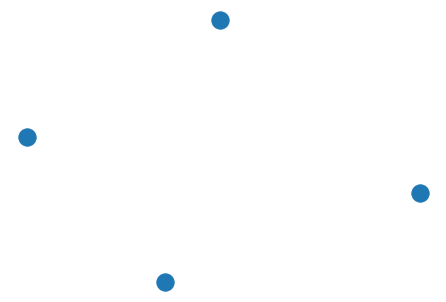

In [3]:
nx.draw(G)

Adding Edges to our Graph: G can also be created or increased by adding one edge at a time by the method add_edge(), which has the two nodes of the edge as the two parameters. We can add a bunch of edges as a list of edges in the form of 2 tuples.



In [ ]:
G.add_edges_from([('1','2'), ('1','4'),('1','3'), ('4','1'),('2','3'),('2','4'),('3','1'),('4','3')])
print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())

# The function G.out_edges('node') returns the numbers of nodes 'node' links to.

print("Number of outward links for each node:")
for page in pages:
    print(["Page %s = %s"% (page,str(len(G.out_edges(page))))])

We can also print the resulting graph by using matplotlib:

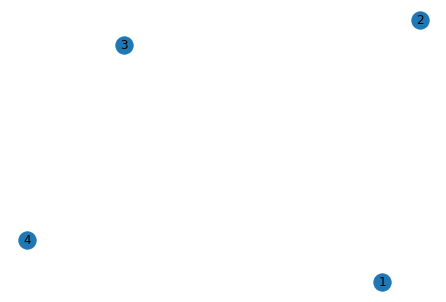

In [4]:
nx.draw(G, with_labels = True)
plt.show() # display

Using the link matrix we can compute the PageRank for a particular graph. The code below returns which page is most important given a link matrix.

In [5]:
def findPageRank(linkmatrix,pages):
    eigval, eigvector= np.linalg.eig(linkmatrix)
    dominant_eigval = np.abs(eigval).max()
    PageRank= np.where(eigval == dominant_eigval)
    print("The most important node is %s"% str(pages[PageRank[0][0]]))
    
linkmatrix = np.matrix([[0,0,1,0.5],
                      [1.0/3,0,0,0],
                      [1.0/3,0,0.5,0.5],
                      [1.0/3,0,0.5,0]])
findPageRank(linkmatrix,pages)

The most important node is 2


Now, let try finding the most important location in Altgeld. Input your data into the  8×8  matrix below.



['1:Office 366 = 1']
['2:Bottom of Spiral = 2']
['3:Soda Machine = 1']
['4:Office 326 = 3']
['5:Post Office = 2']
['6:Library = 2']
['7:Wall Across Room 441 = 2']
['8:Room 239 = 3']


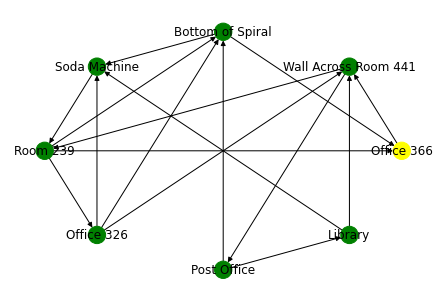

In [11]:
G_Altgeld=nx.DiGraph()
locations = ["Office 366","Bottom of Spiral","Soda Machine","Office 326",
                  "Post Office","Library","Wall Across Room 441","Room 239"]
G.add_nodes_from(locations)
G_Altgeld.add_edges_from([('Office 366','Wall Across Room 441'),
                         ('Bottom of Spiral','Office 366'),('Bottom of Spiral','Soda Machine'),
                         ('Soda Machine','Room 239'),
                         ('Office 326','Soda Machine'),('Office 326','Bottom of Spiral'),('Office 326','Wall Across Room 441'),
                         ('Post Office','Bottom of Spiral'),('Post Office','Library'),
                         ('Library','Soda Machine'),('Library','Wall Across Room 441'),
                         ('Wall Across Room 441','Post Office'),('Wall Across Room 441','Room 239'),
                         ('Room 239', 'Office 366'),('Room 239','Bottom of Spiral'),('Room 239','Office 326')])
i = 0
for name in locations:
    i = i+1
    print(["%d:%s = %s"% (i,name,str(len(G_Altgeld.out_edges(name))))])

color_map = []
for node in G_Altgeld:
    if node == 'Office 366':
        color_map.append('yellow')
    else: 
        color_map.append('green')    
                
nx.draw_circular(G_Altgeld,node_color=color_map, with_labels = True)
plt.show() # display

Compute the Link Matrix for the Altgeld graph. Use the matrix below to input your data. What location is the most important?



In [12]:
linkmatrix_Altgeld = np.matrix([[0,0,0,0,0,0,0,0],
                               [0,0,0,0,0,0,0,0],
                               [0,0,0,0,0,0,0,0],
                               [0,0,0,0,0,0,0,0],
                               [0,0,0,0,0,0,0,0],
                               [0,0,0,0,0,0,0,0],
                               [0,0,0,0,0,0,0,0],
                               [0,0,0,0,0,0,0,0]])
findPageRank(linkmatrix_Altgeld,locations)

The most important node is Office 366
